# RECURRENT NEURAL NETWORK(RNN)

## 1)Business Problem(İş Problemi)

## 2)Data Understanding(Veriyi Anlamak)

## 3)Data Preparation(Veriyi Hazırlama)

## 4)Modelling(Modelleme)

## 5)Evaluation(Değerlendirme)

## 1)Business Problem(İş Problemi)

#### Month: Aylık olarak yer alan tarih değişkenidir.

#### Passengers:İlgili işlem tarihindeki yolcu sayısını, yani aylık yolcu sayısını temsil etmektedir.

https://www.kaggle.com/datasets/andreazzini/international-airline-passengers

In [1]:
!pip install matplotlib

In [2]:
!pip install DateTime

## 2)Data Understanding(Veriyi Anlamak)
### 2.1) Gerekli Kütüphanelerin Import İşlemleri

In [3]:
# Veriyi okuma ve işleme adımında kullanılacak olan kütüphaneler
import numpy as np
import pandas as pd
import datetime as dt
import tensorflow as tf
import matplotlib.pyplot as plt

# Model değerlendirme ve veriyi scale edebilmemiz için 
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# Model için kullanılacak kütüphaneler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Warningleri kapatmak için kullanılmaktadır
import warnings
warnings.filterwarnings("ignore")

# Tensorflow warning engelleme
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

### 2.2) Veri Setini Yüklenmesi ve Verinin Genel Resminin İncelenmesi

In [4]:
df = pd.read_csv("international-airline-passengers.csv")     

In [5]:
df.head()

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [6]:
df.columns

Index(['Month', 'International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60'], dtype='object')

In [7]:
# Değişkenin isimini değiştirerek daha anlaşılır bir forma getiriyoruz.
df.columns = ["Month", "Passengers"]



In [8]:
df.head()

,Month,Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [9]:
df.tail()

,Month,Passengers
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


In [10]:
df.shape

(145, 2)

In [11]:
df.dtypes

Month          object
Passengers    float64
dtype: object

In [12]:
df.isnull().sum()

Month         0
Passengers    1
dtype: int64

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Passengers,144.0,280.298611,119.966317,104.0,180.0,265.5,360.5,622.0


### 3)Data Preparation(Veriyi Hazırlama)

In [14]:
# Son satırda veri bozuk olduğu için o satırı atıyoruz

df = df[:144]

In [15]:
df.tail()

,Month,Passengers
139,1960-08,606.0
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Month       144 non-null    object 
 1   Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.4+ KB


In [17]:
# Görüldüğü üzere Month değişkeni object tipinde ve bu değişkeni datetime olarak değirmemiz gerekmektedir.

df["Month"] = pd.to_datetime(df["Month"])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       144 non-null    datetime64[ns]
 1   Passengers  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.4 KB


In [19]:
print("Minumum Tarih:", (df["Month"]).min())
print("Maksimum Tarih:", (df["Month"]).max())

Minumum Tarih: 1949-01-01 00:00:00
Maksimum Tarih: 1960-12-01 00:00:00


In [20]:
# Month değişkenini index olarak belirliyoruz.

df.index = df["Month"]

In [21]:
df.head()

,Month,Passengers
Month,,
1949-01-01,1949-01-01,112.0
1949-02-01,1949-02-01,118.0
1949-03-01,1949-03-01,132.0
1949-04-01,1949-04-01,129.0
1949-05-01,1949-05-01,121.0


In [22]:
# Değişkenlerin arasından silme işlemini gerçekleştiriyoruz.

df.drop("Month", axis=1, inplace=True)

In [23]:
df.head()

,Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


In [24]:
# Bu dataframe'in bu halini model sonuçlarının analizi için kaydedelim.

result_df = df.copy()

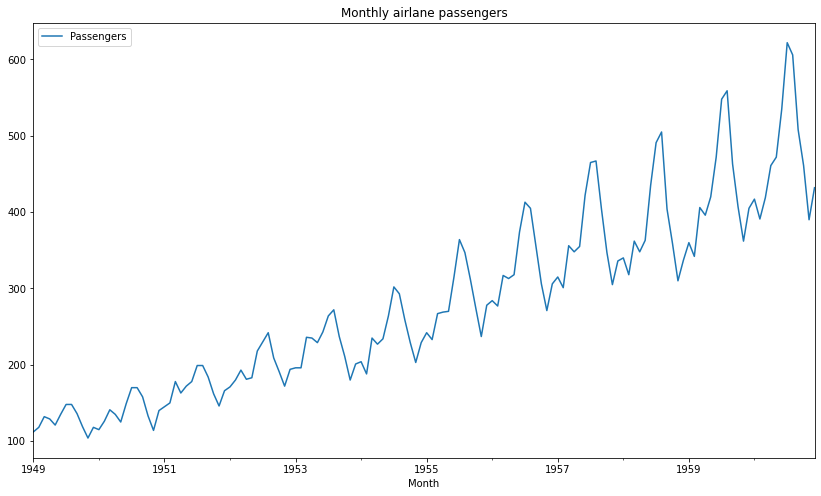

In [25]:
# Veri setini görselleştirelim ve kısaca inceleyelim.

df.plot(figsize=(14,8), title="Monthly airlane passengers");

In [26]:
# Modelleme işlemine başlamadan önce df olan verimizi numpy.ndarray' e çeviriyoruz çünkü modele bu tipte gönderiyor olucağız. 

data = df["Passengers"].values

In [27]:
data[0:5]

array([112., 118., 132., 129., 121.])

In [28]:
type(data[0:5])

numpy.ndarray

In [29]:
type(data[0])

numpy.float64

In [30]:
# Sinir ağını kullanırken yaygınca kullanılan format float32 dir. Bu sebeple çeviriyoruz.

data = data.astype("float32")

In [31]:
type(data[0])

numpy.float32

In [32]:
data.shape

(144,)

In [33]:
# Veriyi modele sokmadan önce bir boyut ayarlaması yapmamız gerekmektedir.

data = data.reshape(-1,1)

In [34]:
data.shape

(144, 1)

In [35]:
# Elimizdeki veriyi train ve test olarak 2' ye ayırıyor olucağız.
# Fakat train ve test olarak ayırmamız rastgele olmamalıdır çünkü zaman serileri(TimeSeries) üzerinde çalışıyoruz.
# Bu yüzden sklearn.model_selection bize sunduğu train_test_split fonksiyonunu burda kullanamayız.
# Elimizde zamana bağlı bir veri olduğundan train,test ayrıma işlemlerini daha kontrollü yapmalıyız.
# Bu işlem için bir fonksiyon tanımlıyoruz.

def split_data(dataframe, test_size):
    position = int(round(len(dataframe) * (1-test_size)))
    train = dataframe[:position]
    test = dataframe[position:]
    return train,test, position

In [36]:
# Ayırma işlemini tam sayı gelebilmesi için 0.33 almış olduk fakat daha farklı yüzdelikler alınabilir.

train, test, position = split_data(data, 0.33)

In [37]:
print(train.shape, test.shape)

(96, 1) (48, 1)


In [38]:
# Optimizayon süresini kısaltmak adına standartlaşma işlemi uyguluyoruz.
# Amacımız hız, performans kazandırmak ve değişkenlerin birbirlerinin etkilerine gölge düşürmemesini sağlamaktır.
# Dönüştürme işlemini Data Leakage problemininin önüne geçmek için test ve train veri setlerine ayrı ayrı uyguluyoruz.
# Eğer dönüştüme tüm veri setine yapılsaydı train setindeki örüntüler set setindeki örüntülere işaret edecek olacaktı.

scaler_train = MinMaxScaler(feature_range = (0,1))
train = scaler_train.fit_transform(train)


scaler_test = MinMaxScaler(feature_range = (0,1))
test = scaler_test.fit_transform(test)

In [39]:
train[0:5]

array([[0.02588999],
       [0.04530746],
       [0.09061491],
       [0.08090615],
       [0.05501619]], dtype=float32)

In [40]:
test[0:5]

array([[0.04361373],
       [0.        ],
       [0.17133951],
       [0.1464175 ],
       [0.16822433]], dtype=float32)

In [41]:
# Veri setine yeni bir değişken ekleme işlemi gerçekleştireceğiz.
# Zaman serilerinde serinin t anındaki değeri en fazla kendisinden bir önceki zaman periyodundan(t-1) etkilenir. 
# Bunun için bir fonksiyon tanımlayalım.

def  create_features(data, lookback):
    X, Y = [], []
    for i in range(lookback, len(data)):
        X.append(data[i-lookback:i,0])
        Y.append(data[i,0])
        
    return np.array(X), np.array(Y)    

In [42]:
lookback = 1


In [43]:
# Train veri seti
X_train, y_train = create_features(train, lookback)

In [44]:
# Test veri seti
X_test, y_test = create_features(test, lookback)

In [45]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(95, 1) (95,) (47, 1) (47,)


In [46]:
# Veri setini modele göndermeden önce RNN'in istediği formata getirmemiz gerekmektedir.
# Dolayısıyla 3 boyutlu bir yapıda olması gerekmektedir.

X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [47]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(95, 1, 1) (95, 1) (47, 1, 1) (47, 1)


## 4)Modelling(Modelleme)

In [48]:
# Sequential() ile birlikte dizi şeklinde sıralı katmanlardan oluşan sir ağımızı kuruyoruz.
# Sinir ağının aşırı öğrenmesinin önüne geçmek için dropout katmanını ekliyoruz. 
# Son katman olarak çıktı katmanını ekliyoruz.Sınıflandırma problemi olmadığı için nöron sayısını 1 olarak belirliyoruz.
# Kullanıcı tarafından belirlenen değerlere hiperparametre denir.

model= Sequential()

model.add(SimpleRNN(units=50,
                    activation="relu",
                    input_shape=(X_train.shape[1], lookback)))
model.add(Dropout(0.2))
model.add(Dense(1))

In [49]:
# Gözlemlemeye çalışalım

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 50)                2600      
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________


In [50]:
# Optimizasyon ve Değerlendirme Metrikleri Ayarlanması
# Çıktı değikeninin sayısal olduğu bir senaryodayız ve başarıyı değerlendirme yöntemlerimizden birisi "mean_squared_error"dur.
# loss fonksiyonunu optimize etme için optimizer="adam" olarak veriyoruz.Farklı fonksiyonlar denenebilir.

model.compile(loss="mean_squared_error", optimizer="adam")

In [51]:
# Modelmizin aşırı öğrenmesine engel olmak adına EarlyStopping ayarlaması yapacağız.
# EarlyStopping validation loss da belirli bir noktadan sonra düşme olmazsa dur deme imkanını sağlar.
# monitor---> Modelin bu gelişiminin hangi parametle tahmin edileceğini ifade eder.
# patience---> Eğitimin durdurulacağı iyileşme olmayan dönein sayısını ifade eder.
# verbose---> Burdaki işlemin raporlanma şeklini ifade etmektedir.       
# verbose=1 anlık olarak sonuç gösterir.verbose=2 her epoch sonunda gösterir.verbose=0 ekrana herhangi bir bilgi göstermez.
# mode='min' izlediğimiz miktarın azalması durduğunda eğitim durur.mode='max' ise artması durduğunda eğitim durur.
# Otamatik modda ise gidelecek yön izlenen miktarın ardından otomatik olarak çıkarılır.

# Modelimiz çalışırken modelimizi kaydetme adına bazı ayarmalarımızı yapmamız gerekmektedir.(ModelCheckpoint)
# save_best_only=True---> En iyi modeli kaydetme
# save_weights_only=False---> Bütün model özelliklerini kaydetme, True durumunda sadece ağırlıkları kaydeder.


callbacks = [EarlyStopping(monitor="val_loss", patience=3, verbose=1, mode="min"),
            ModelCheckpoint(filepath="mymodel.h5", monitor="val_loss", mode="min",
                           save_best_only=True, save_weights_only=False, verbose=1)]

In [52]:
history = model.fit(x=X_train,
                    y=y_train,
                    epochs=50,
                    batch_size=1,
                    validation_data=(X_test, y_test),
                    callbacks= callbacks,
                    shuffle=False)

Epoch 1/50
89/95 [===========================>..] - ETA: 0s - loss: 0.0094
Epoch 1: val_loss improved from inf to 0.03491, saving model to mymodel.h5
95/95 [==============================] - 4s 15ms/step - loss: 0.0099 - val_loss: 0.0349
Epoch 2/50
91/95 [===========================>..] - ETA: 0s - loss: 0.0179
Epoch 2: val_loss improved from 0.03491 to 0.02612, saving model to mymodel.h5
95/95 [==============================] - 1s 8ms/step - loss: 0.0180 - val_loss: 0.0261
Epoch 3/50
93/95 [============================>.] - ETA: 0s - loss: 0.0101
Epoch 3: val_loss improved from 0.02612 to 0.02220, saving model to mymodel.h5
95/95 [==============================] - 1s 8ms/step - loss: 0.0100 - val_loss: 0.0222
Epoch 4/50
90/95 [===========================>..] - ETA: 0s - loss: 0.0094
Epoch 4: val_loss improved from 0.02220 to 0.02146, saving model to mymodel.h5
95/95 [==============================] - 1s 10ms/step - loss: 0.0099 - val_loss: 0.0215
Epoch 5/50
88/95 [====================

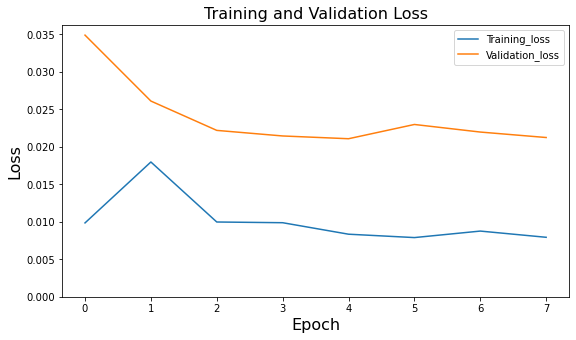

In [53]:
# Grafik oluşturmak istersek eğer;

plt.figure(figsize=(20,5))
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Training_loss")
plt.plot(history.history["val_loss"], label="Validation_loss")
plt.legend(loc="upper right")
plt.xlabel("Epoch", fontsize=16)
plt.ylabel("Loss", fontsize=16)
plt.ylim([0, max(plt.ylim())])
plt.title("Training and Validation Loss", fontsize=16)
plt.show()

## 5)Evaluation(Değerlendirme)

In [54]:
loss = model.evaluate(X_test, y_test, batch_size=1)
print("/nTest loss: %.1f%%" % (100.0 * loss))

47/47 [==============================] - 0s 4ms/step - loss: 0.0213
/nTest loss: 2.1%


In [55]:
# Tahmin etme işlemlerine geçiyoruz

train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

2/2 [==============================] - 0s 6ms/step


In [56]:
# Modelleme öncesi yaptığımız standartlaştırma işlemini geriye çeviriyoruz.Daha sağlıklı bir kıyaslama imkanı sağlar.

train_predict = scaler_train.inverse_transform(train_predict)
test_predict = scaler_test.inverse_transform(test_predict)

y_train = scaler_train.inverse_transform(y_train)
y_test = scaler_test.inverse_transform(y_test)

In [58]:
# Train veri setine ait RMSE değeri

train_rmse= np.sqrt(mean_squared_error(y_train,train_predict))

In [60]:
# Test veri setine ait RMSE değeri

test_rmse= np.sqrt(mean_squared_error(y_test,test_predict))

In [61]:
print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")

Train RMSE: 22.82291603088379
Test RMSE: 46.7946891784668


In [62]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Passengers,144.0,280.298611,119.966317,104.0,180.0,265.5,360.5,622.0


In [69]:
# Dikkat edilmesi gereken konu train setinin ilk gözleminden önce bir değerin olmamasıdır.

train_prediction_df = result_df[lookback:position]
train_prediction_df["Predicted"] = train_predict

In [70]:
train_prediction_df.head()

,Passengers,Predicted
Month,,
1949-02-01,118.0,125.225380
1949-03-01,132.0,128.395477
1949-04-01,129.0,139.132675
1949-05-01,121.0,136.661316
1949-06-01,135.0,130.566559


In [71]:
test_prediction_df = result_df[position+lookback:]
test_prediction_df["Predicted"] = test_predict
test_prediction_df.head()

,Passengers,Predicted
Month,,
1957-02-01,301.0,325.961761
1957-03-01,356.0,319.630951
1957-04-01,348.0,362.465027
1957-05-01,355.0,354.664001
1957-06-01,422.0,361.489929


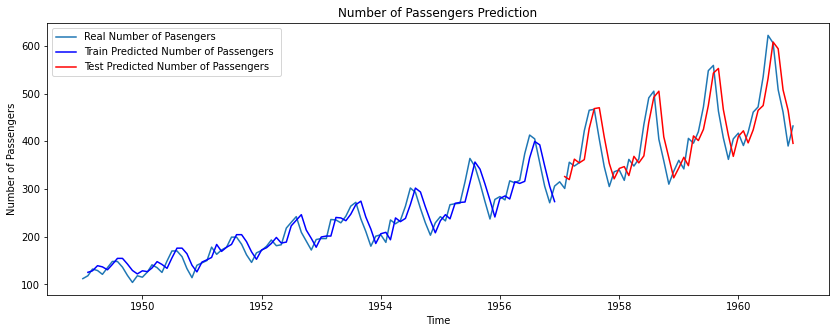

In [72]:
# Train ve Test Tahminlerini ayrı ayrı görselleştirme işlemi

plt.figure(figsize=(14,5))
plt.plot(result_df, label="Real Number of Pasengers")
plt.plot(train_prediction_df["Predicted"], color = "blue", label = "Train Predicted Number of Passengers ")
plt.plot(test_prediction_df["Predicted"], color = "red", label = "Test Predicted Number of Passengers ")
plt.xlabel("Time")
plt.ylabel("Number of Passengers")
plt.title("Number of Passengers Prediction")
plt.legend()
plt.show()